Identify that the compound is **cardiotoxic** or **non-cardiotoxic**.

Data:
* CSV (IC50 value, MACC fingerprint)
* SDF (series of molfiles)

Macc fingerprint:
* List of 166 (keys) binary values (0 or 1) which characterize a molecule.


In [ ]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import MolToSmiles


# 2. Data Analyse and Preprocessing 📊

In [ ]:
pd.set_option('display.max_columns', None)
data_path = "data/cardiotoxicity_hERG_MACCSFP_ready_set.csv" 
df = pd.read_csv(data_path)
print("Examples: {0}, columns: {1}".format(df.shape[0],df.shape[1]))
df.head()

Examples: 11504, columns: 167


,IC50,MACCSFP1,MACCSFP2,MACCSFP3,MACCSFP4,MACCSFP5,MACCSFP6,MACCSFP7,MACCSFP8,MACCSFP9,MACCSFP10,MACCSFP11,MACCSFP12,MACCSFP13,MACCSFP14,MACCSFP15,MACCSFP16,MACCSFP17,MACCSFP18,MACCSFP19,MACCSFP20,MACCSFP21,MACCSFP22,MACCSFP23,MACCSFP24,MACCSFP25,MACCSFP26,MACCSFP27,MACCSFP28,MACCSFP29,MACCSFP30,MACCSFP31,MACCSFP32,MACCSFP33,MACCSFP34,MACCSFP35,MACCSFP36,MACCSFP37,MACCSFP38,MACCSFP39,MACCSFP40,MACCSFP41,MACCSFP42,MACCSFP43,MACCSFP44,MACCSFP45,MACCSFP46,MACCSFP47,MACCSFP48,MACCSFP49,MACCSFP50,MACCSFP51,MACCSFP52,MACCSFP53,MACCSFP54,MACCSFP55,MACCSFP56,MACCSFP57,MACCSFP58,MACCSFP59,MACCSFP60,MACCSFP61,MACCSFP62,MACCSFP63,MACCSFP64,MACCSFP65,MACCSFP66,MACCSFP67,MACCSFP68,MACCSFP69,MACCSFP70,MACCSFP71,MACCSFP72,MACCSFP73,MACCSFP74,MACCSFP75,MACCSFP76,MACCSFP77,MACCSFP78,MACCSFP79,MACCSFP80,MACCSFP81,MACCSFP82,MACCSFP83,MACCSFP84,MACCSFP85,MACCSFP86,MACCSFP87,MACCSFP88,MACCSFP89,MACCSFP90,MACCSFP91,MACCSFP92,MACCSFP93,MACCSFP94,MACCSFP95,MACCSFP96,MACCSFP97,MACCSFP98,MACCSFP99,MACCSFP100,MACCSFP101,MACCSFP102,MACCSFP103,MACCSFP104,MACCSFP105,MACCSFP106,MACCSFP107,MACCSFP108,MACCSFP109,MACCSFP110,MACCSFP111,MACCSFP112,MACCSFP113,MACCSFP114,MACCSFP115,MACCSFP116,MACCSFP117,MACCSFP118,MACCSFP119,MACCSFP120,MACCSFP121,MACCSFP122,MACCSFP123,MACCSFP124,MACCSFP125,MACCSFP126,MACCSFP127,MACCSFP128,MACCSFP129,MACCSFP130,MACCSFP131,MACCSFP132,MACCSFP133,MACCSFP134,MACCSFP135,MACCSFP136,MACCSFP137,MACCSFP138,MACCSFP139,MACCSFP140,MACCSFP141,MACCSFP142,MACCSFP143,MACCSFP144,MACCSFP145,MACCSFP146,MACCSFP147,MACCSFP148,MACCSFP149,MACCSFP150,MACCSFP151,MACCSFP152,MACCSFP153,MACCSFP154,MACCSFP155,MACCSFP156,MACCSFP157,MACCSFP158,MACCSFP159,MACCSFP160,MACCSFP161,MACCSFP162,MACCSFP163,MACCSFP164,MACCSFP165,MACCSFP166
0,645.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,1,1,1,0,1,0,1,1,0,1,1,1,1,1,1,0
1,6600.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,1,1,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1,0,1,0,1,1,0,0,0,1,1,1,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
2,1600.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,1,1,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1,0,1,0,1,1,0,0,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
3,6700.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,1,1,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1,0,1,0,1,1,0,0,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
4,6600.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,1,1,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1,0,1,0,1,1,0,0,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0


### 2.1 Missing/Invalid values 🔎

In [ ]:
# count missing values
print("Missing values: {0}".format(df.isnull().sum().sum()))

Missing values: 0


In [ ]:
# Convert non-numeric entries to NaN (everything that cannot be converted to a numeric value)
num_df = (df.drop(df.columns, axis=1)
         .join(df[df.columns].apply(pd.to_numeric, errors='coerce')))

In [ ]:
# and then keep only rows where all values are not null
num_df = num_df[num_df[df.columns].notnull().all(axis=1)]
num_df

,IC50,MACCSFP1,MACCSFP2,MACCSFP3,MACCSFP4,MACCSFP5,MACCSFP6,MACCSFP7,MACCSFP8,MACCSFP9,MACCSFP10,MACCSFP11,MACCSFP12,MACCSFP13,MACCSFP14,MACCSFP15,MACCSFP16,MACCSFP17,MACCSFP18,MACCSFP19,MACCSFP20,MACCSFP21,MACCSFP22,MACCSFP23,MACCSFP24,MACCSFP25,MACCSFP26,MACCSFP27,MACCSFP28,MACCSFP29,MACCSFP30,MACCSFP31,MACCSFP32,MACCSFP33,MACCSFP34,MACCSFP35,MACCSFP36,MACCSFP37,MACCSFP38,MACCSFP39,MACCSFP40,MACCSFP41,MACCSFP42,MACCSFP43,MACCSFP44,MACCSFP45,MACCSFP46,MACCSFP47,MACCSFP48,MACCSFP49,MACCSFP50,MACCSFP51,MACCSFP52,MACCSFP53,MACCSFP54,MACCSFP55,MACCSFP56,MACCSFP57,MACCSFP58,MACCSFP59,MACCSFP60,MACCSFP61,MACCSFP62,MACCSFP63,MACCSFP64,MACCSFP65,MACCSFP66,MACCSFP67,MACCSFP68,MACCSFP69,MACCSFP70,MACCSFP71,MACCSFP72,MACCSFP73,MACCSFP74,MACCSFP75,MACCSFP76,MACCSFP77,MACCSFP78,MACCSFP79,MACCSFP80,MACCSFP81,MACCSFP82,MACCSFP83,MACCSFP84,MACCSFP85,MACCSFP86,MACCSFP87,MACCSFP88,MACCSFP89,MACCSFP90,MACCSFP91,MACCSFP92,MACCSFP93,MACCSFP94,MACCSFP95,MACCSFP96,MACCSFP97,MACCSFP98,MACCSFP99,MACCSFP100,MACCSFP101,MACCSFP102,MACCSFP103,MACCSFP104,MACCSFP105,MACCSFP106,MACCSFP107,MACCSFP108,MACCSFP109,MACCSFP110,MACCSFP111,MACCSFP112,MACCSFP113,MACCSFP114,MACCSFP115,MACCSFP116,MACCSFP117,MACCSFP118,MACCSFP119,MACCSFP120,MACCSFP121,MACCSFP122,MACCSFP123,MACCSFP124,MACCSFP125,MACCSFP126,MACCSFP127,MACCSFP128,MACCSFP129,MACCSFP130,MACCSFP131,MACCSFP132,MACCSFP133,MACCSFP134,MACCSFP135,MACCSFP136,MACCSFP137,MACCSFP138,MACCSFP139,MACCSFP140,MACCSFP141,MACCSFP142,MACCSFP143,MACCSFP144,MACCSFP145,MACCSFP146,MACCSFP147,MACCSFP148,MACCSFP149,MACCSFP150,MACCSFP151,MACCSFP152,MACCSFP153,MACCSFP154,MACCSFP155,MACCSFP156,MACCSFP157,MACCSFP158,MACCSFP159,MACCSFP160,MACCSFP161,MACCSFP162,MACCSFP163,MACCSFP164,MACCSFP165,MACCSFP166
0,645.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,1,1,1,0,1,0,1,1,0,1,1,1,1,1,1,0
1,6600.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,1,1,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1,0,1,0,1,1,0,0,0,1,1,1,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
2,1600.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,1,1,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1,0,1,0,1,1,0,0,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
3,6700.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,1,1,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1,0,1,0,1,1,0,0,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
4,6600.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,1,1,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1,0,1,0,1,1,0,0,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

### 2.2 Class balance/Outliers

In [ ]:
num_df['IC50'].describe()

count    1.063400e+04
mean     3.182548e+05
std      1.400203e+07
min      1.400000e-01
25%      2.034250e+03
50%      1.000000e+04
75%      3.000000e+04
max      1.000000e+09
Name: IC50, dtype: float64

In [ ]:
toxity = num_df[num_df['IC50']<=1000].count()[0]
non_toxity = num_df[num_df['IC50']>1000].count()[0]
all_tox = num_df['IC50'].count()
print('For 1000: {0} Toxity compounds and {1} non toxity compounds'.format(toxity, non_toxity))
print('For 1000: {:.2%} Toxity compounds and {:.2%} non toxity compounds'.format(toxity/all_tox, non_toxity/all_tox))
toxity = num_df[num_df['IC50']<=10000].count()[0]
non_toxity = num_df[num_df['IC50']>10000].count()[0]
print('For 10000: {0} Toxity compounds and {1} non toxity compounds'.format(toxity, non_toxity))
print('For 10000: {:.2%} Toxity compounds and {:.2%} non toxity compounds'.format(toxity/all_tox, non_toxity/all_tox))


For 1000: 1841 Toxity compounds and 8793 non toxity compounds
For 1000: 17.31% Toxity compounds and 82.69% non toxity compounds
For 10000: 6208 Toxity compounds and 4426 non toxity compounds
For 10000: 58.38% Toxity compounds and 41.62% non toxity compounds


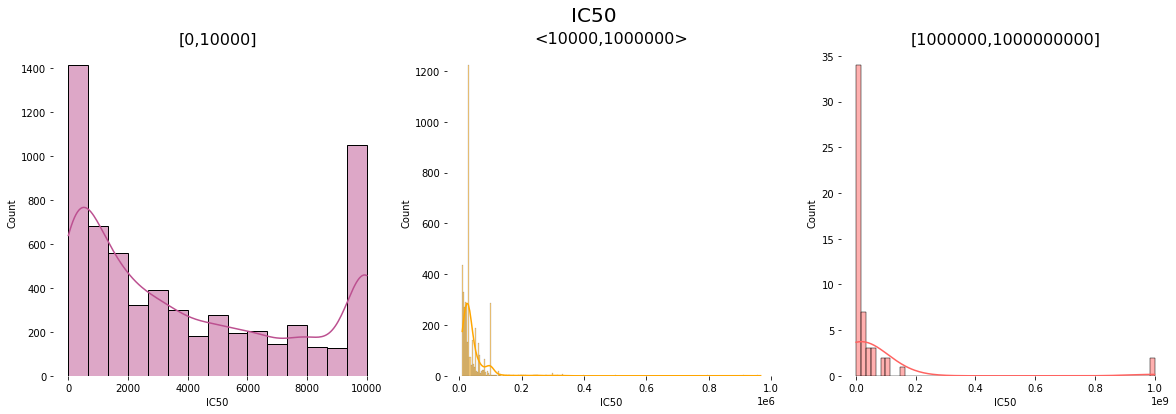

In [ ]:
IC_50_1 = num_df[num_df['IC50']<=10000]
IC_50_2 = num_df[num_df['IC50'].between(10000, 1000000, inclusive=False)]
IC_50_3 = num_df[num_df['IC50'].between(1000000,1000000000, inclusive=True)]

fig, axes = plt.subplots(1, 3, figsize = (20, 6))
fig.suptitle('IC50', fontsize=20)
left = sns.histplot(data=IC_50_1, x='IC50', ax = axes[0], kde=True, color=colors_palette[2])
center = sns.histplot(data=IC_50_2, x='IC50', ax = axes[1], kde=True, color=colors_palette[0])
right = sns.histplot(data=IC_50_3, x='IC50', ax = axes[2], kde=True, color=colors_palette[1])
axes[0].set_title('[0,10000]', fontsize=16)
axes[1].set_title('<10000,1000000>', fontsize=16)
axes[2].set_title('[1000000,1000000000]', fontsize=16)

sns.despine(left=True, bottom=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
df_scaled = StandardScaler().fit_transform(num_df['IC50'][:,np.newaxis]);
low_range = df_scaled[df_scaled[:,0].argsort()][:10]
high_range= df_scaled[df_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-0.02273025]
 [-0.02273024]
 [-0.02273024]
 [-0.02273023]
 [-0.02273023]
 [-0.02273023]
 [-0.02273023]
 [-0.02273022]
 [-0.02273021]
 [-0.02273021]]

outer range (high) of the distribution:
[[ 4.4836665 ]
 [ 4.58863397]
 [ 4.69604644]
 [ 6.0562317 ]
 [ 6.95685193]
 [ 7.11942729]
 [ 7.11942729]
 [11.29682661]
 [71.39884517]
 [71.39884517]]


<ipython-input-15-77e3a171ecba>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_scaled = StandardScaler().fit_transform(num_df['IC50'][:,np.newaxis]);


In [ ]:
# drop 2 outliers
sdf_to_drop.extend(num_df[num_df['IC50']>=1000000000].index)
num_df = num_df[num_df['IC50']<1000000000]
num_df

,IC50,MACCSFP1,MACCSFP2,MACCSFP3,MACCSFP4,MACCSFP5,MACCSFP6,MACCSFP7,MACCSFP8,MACCSFP9,MACCSFP10,MACCSFP11,MACCSFP12,MACCSFP13,MACCSFP14,MACCSFP15,MACCSFP16,MACCSFP17,MACCSFP18,MACCSFP19,MACCSFP20,MACCSFP21,MACCSFP22,MACCSFP23,MACCSFP24,MACCSFP25,MACCSFP26,MACCSFP27,MACCSFP28,MACCSFP29,MACCSFP30,MACCSFP31,MACCSFP32,MACCSFP33,MACCSFP34,MACCSFP35,MACCSFP36,MACCSFP37,MACCSFP38,MACCSFP39,MACCSFP40,MACCSFP41,MACCSFP42,MACCSFP43,MACCSFP44,MACCSFP45,MACCSFP46,MACCSFP47,MACCSFP48,MACCSFP49,MACCSFP50,MACCSFP51,MACCSFP52,MACCSFP53,MACCSFP54,MACCSFP55,MACCSFP56,MACCSFP57,MACCSFP58,MACCSFP59,MACCSFP60,MACCSFP61,MACCSFP62,MACCSFP63,MACCSFP64,MACCSFP65,MACCSFP66,MACCSFP67,MACCSFP68,MACCSFP69,MACCSFP70,MACCSFP71,MACCSFP72,MACCSFP73,MACCSFP74,MACCSFP75,MACCSFP76,MACCSFP77,MACCSFP78,MACCSFP79,MACCSFP80,MACCSFP81,MACCSFP82,MACCSFP83,MACCSFP84,MACCSFP85,MACCSFP86,MACCSFP87,MACCSFP88,MACCSFP89,MACCSFP90,MACCSFP91,MACCSFP92,MACCSFP93,MACCSFP94,MACCSFP95,MACCSFP96,MACCSFP97,MACCSFP98,MACCSFP99,MACCSFP100,MACCSFP101,MACCSFP102,MACCSFP103,MACCSFP104,MACCSFP105,MACCSFP106,MACCSFP107,MACCSFP108,MACCSFP109,MACCSFP110,MACCSFP111,MACCSFP112,MACCSFP113,MACCSFP114,MACCSFP115,MACCSFP116,MACCSFP117,MACCSFP118,MACCSFP119,MACCSFP120,MACCSFP121,MACCSFP122,MACCSFP123,MACCSFP124,MACCSFP125,MACCSFP126,MACCSFP127,MACCSFP128,MACCSFP129,MACCSFP130,MACCSFP131,MACCSFP132,MACCSFP133,MACCSFP134,MACCSFP135,MACCSFP136,MACCSFP137,MACCSFP138,MACCSFP139,MACCSFP140,MACCSFP141,MACCSFP142,MACCSFP143,MACCSFP144,MACCSFP145,MACCSFP146,MACCSFP147,MACCSFP148,MACCSFP149,MACCSFP150,MACCSFP151,MACCSFP152,MACCSFP153,MACCSFP154,MACCSFP155,MACCSFP156,MACCSFP157,MACCSFP158,MACCSFP159,MACCSFP160,MACCSFP161,MACCSFP162,MACCSFP163,MACCSFP164,MACCSFP165,MACCSFP166
0,645.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,1,1,1,0,1,0,1,1,0,1,1,1,1,1,1,0
1,6600.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,1,1,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1,0,1,0,1,1,0,0,0,1,1,1,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
2,1600.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,1,1,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1,0,1,0,1,1,0,0,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
3,6700.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,1,1,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1,0,1,0,1,1,0,0,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
4,6600.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,1,1,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1,0,1,0,1,1,0,0,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
num_df['IC50'].describe()

count    1.063200e+04
mean     1.302033e+05
std      2.837080e+06
min      1.400000e-01
25%      2.030000e+03
50%      1.000000e+04
75%      3.000000e+04
max      1.584893e+08
Name: IC50, dtype: float64

### 2.3 Convert IC50 to pIC50

1. Convert nM to M.
2. Apply -log10.

IC50 -> higher values are better: <=10000 nM -> active (toxic)

pIC50 -> lower values are better (higher values -> stronger inhibitors): >=5.0 -> active (toxic).

In [ ]:
num_df = num_df.assign(IC50 = -np.log10(num_df.IC50*(10**-9)))
num_df.rename(columns={"IC50": "pIC50"}, inplace = True)
num_df

,pIC50,MACCSFP1,MACCSFP2,MACCSFP3,MACCSFP4,MACCSFP5,MACCSFP6,MACCSFP7,MACCSFP8,MACCSFP9,MACCSFP10,MACCSFP11,MACCSFP12,MACCSFP13,MACCSFP14,MACCSFP15,MACCSFP16,MACCSFP17,MACCSFP18,MACCSFP19,MACCSFP20,MACCSFP21,MACCSFP22,MACCSFP23,MACCSFP24,MACCSFP25,MACCSFP26,MACCSFP27,MACCSFP28,MACCSFP29,MACCSFP30,MACCSFP31,MACCSFP32,MACCSFP33,MACCSFP34,MACCSFP35,MACCSFP36,MACCSFP37,MACCSFP38,MACCSFP39,MACCSFP40,MACCSFP41,MACCSFP42,MACCSFP43,MACCSFP44,MACCSFP45,MACCSFP46,MACCSFP47,MACCSFP48,MACCSFP49,MACCSFP50,MACCSFP51,MACCSFP52,MACCSFP53,MACCSFP54,MACCSFP55,MACCSFP56,MACCSFP57,MACCSFP58,MACCSFP59,MACCSFP60,MACCSFP61,MACCSFP62,MACCSFP63,MACCSFP64,MACCSFP65,MACCSFP66,MACCSFP67,MACCSFP68,MACCSFP69,MACCSFP70,MACCSFP71,MACCSFP72,MACCSFP73,MACCSFP74,MACCSFP75,MACCSFP76,MACCSFP77,MACCSFP78,MACCSFP79,MACCSFP80,MACCSFP81,MACCSFP82,MACCSFP83,MACCSFP84,MACCSFP85,MACCSFP86,MACCSFP87,MACCSFP88,MACCSFP89,MACCSFP90,MACCSFP91,MACCSFP92,MACCSFP93,MACCSFP94,MACCSFP95,MACCSFP96,MACCSFP97,MACCSFP98,MACCSFP99,MACCSFP100,MACCSFP101,MACCSFP102,MACCSFP103,MACCSFP104,MACCSFP105,MACCSFP106,MACCSFP107,MACCSFP108,MACCSFP109,MACCSFP110,MACCSFP111,MACCSFP112,MACCSFP113,MACCSFP114,MACCSFP115,MACCSFP116,MACCSFP117,MACCSFP118,MACCSFP119,MACCSFP120,MACCSFP121,MACCSFP122,MACCSFP123,MACCSFP124,MACCSFP125,MACCSFP126,MACCSFP127,MACCSFP128,MACCSFP129,MACCSFP130,MACCSFP131,MACCSFP132,MACCSFP133,MACCSFP134,MACCSFP135,MACCSFP136,MACCSFP137,MACCSFP138,MACCSFP139,MACCSFP140,MACCSFP141,MACCSFP142,MACCSFP143,MACCSFP144,MACCSFP145,MACCSFP146,MACCSFP147,MACCSFP148,MACCSFP149,MACCSFP150,MACCSFP151,MACCSFP152,MACCSFP153,MACCSFP154,MACCSFP155,MACCSFP156,MACCSFP157,MACCSFP158,MACCSFP159,MACCSFP160,MACCSFP161,MACCSFP162,MACCSFP163,MACCSFP164,MACCSFP165,MACCSFP166
0,6.190440,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,1,1,1,0,1,0,1,1,0,1,1,1,1,1,1,0
1,5.180456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,1,1,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1,0,1,0,1,1,0,0,0,1,1,1,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
2,5.795880,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,1,1,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1,0,1,0,1,1,0,0,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
3,5.173925,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,1,1,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1,0,1,0,1,1,0,0,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
4,5.180456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,1,1,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1,0,1,0,1,1,0,0,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
num_df['pIC50'].describe()

count    10632.000000
mean         5.234620
std          0.951665
min          0.800000
25%          4.522879
50%          5.000000
75%          5.692504
max          9.853872
Name: pIC50, dtype: float64

### 2.4 Classes statistics 📈

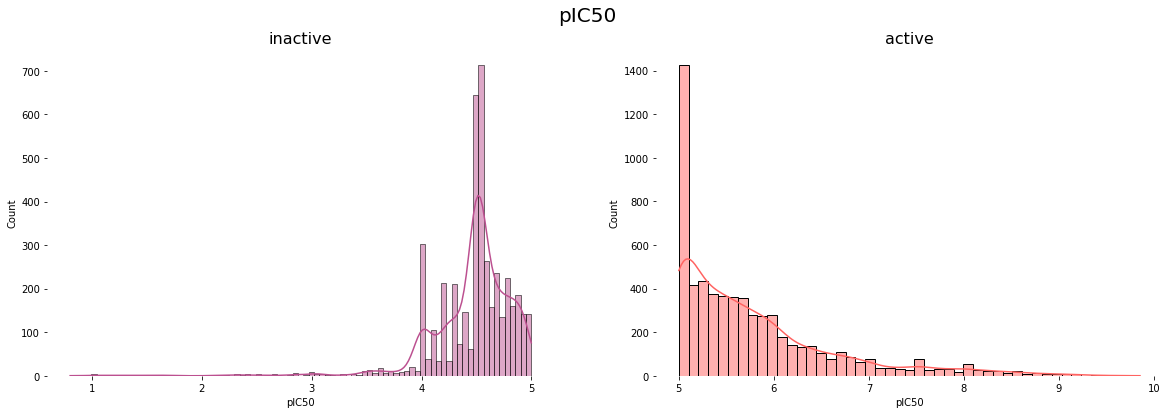

In [ ]:
IC_50_1 = num_df[num_df['pIC50']<5]
IC_50_2 = num_df[num_df['pIC50']>=5]

fig, axes = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle('pIC50', fontsize=20)
left = sns.histplot(data=IC_50_1, x='pIC50', ax = axes[0], kde=True, color=colors_palette[2])
right = sns.histplot(data=IC_50_2, x='pIC50', ax = axes[1], kde=True, color=colors_palette[1])
axes[0].set_title('inactive', fontsize=16)
axes[1].set_title('active', fontsize=16)

sns.despine(left=True, bottom=True)

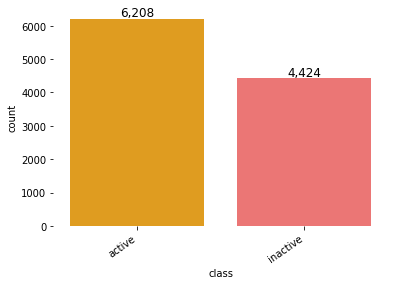

In [ ]:
def annotate(ax, fontsize=12):
    for p in ax.patches:
        ax.annotate(format(p.get_height(), ','), 
               (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
               xytext = (0, 6), textcoords = 'offset points', fontsize=fontsize)

activity_th = []
for i in num_df.pIC50:
    if float(i) < 5:
        activity_th.append("inactive")
    elif float(i) >= 5:
        activity_th.append("active")
    
activity_class = pd.Series(activity_th, name='class')
class_df = pd.concat([num_df, activity_class], axis=1)

a = sns.countplot(x='class', data=class_df, palette=colors_palette)

annotate(a)

a.set_xticklabels(a.get_xticklabels(), rotation=35, ha="right")
sns.despine(left=True, bottom=True);

Text(0, 0.5, 'pIC50 value')

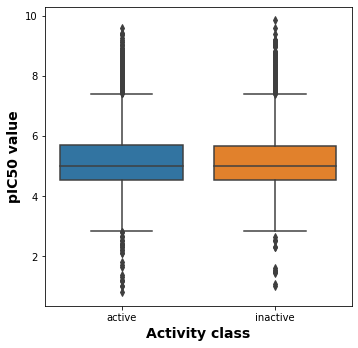

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = class_df)

plt.xlabel('Activity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')